# Syllabus dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Create Dataset

In [2]:
P1=[0.1,0.6]
P2=[0.15,0.71]
P3=[0.08,0.9]
P4=[0.16,0.85]
P5=[0.2,0.3]
P6=[0.25,0.5]
P7=[0.24,0.1]
P8=[0.3,0.2]

data = np.array([P1, P2, P3, P4, P5, P6, P7, P8])
X = data[:,0]
Y = data[:,1]

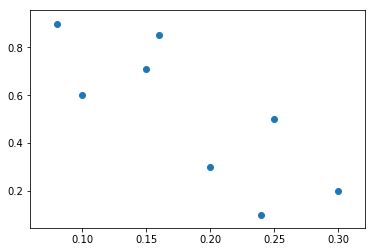

In [3]:
plt.scatter(X, Y)
plt.show()

# Create Classifier

## Classifier with initial centorids

In [4]:
kmeans = KMeans(n_clusters=2, init=np.array([P1, P8])) # initialize with centroids as p1 and p8
kmeans.fit(data)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[0.1, 0.6],
       [0.3, 0.2]]), max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Final centroids

In [5]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.148      0.712     ]
 [0.24666667 0.2       ]]


In [6]:
labels = kmeans.labels_
print(labels)

[0 0 0 0 1 0 1 1]


In [7]:
c1 = []
c2 = []
for i,val in enumerate(labels):
    if val==1:
        c1.append(data[i])
    else:
        c2.append(data[i])
c1 = np.array(c1)
c2 = np.array(c2)
c1[:,0]

array([0.2 , 0.24, 0.3 ])

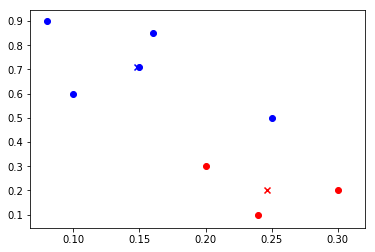

In [8]:
plt.scatter(c1[:,0], c1[:,1], c='red')
plt.scatter(c2[:,0], c2[:,1], c='blue')
plt.scatter(centroids[0,0], centroids[0,1], marker='x', c='blue')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', c='red')
plt.show()

## Prediction

In [9]:
kmeans.predict([P6])

array([0])

# Default dataset

## Dataset

In [10]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


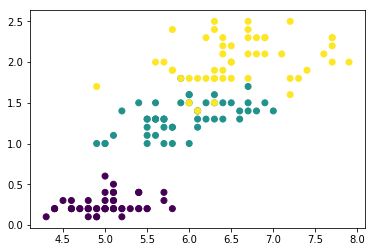

In [11]:
import matplotlib.pyplot as plt
X = df.iloc[:,0]
Y = df.iloc[:,3]
plt.scatter(X, Y, c= iris.target)
plt.show()

## Classifier

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,[0,3]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [14]:
import numpy as np
c1 = []
c2 = []
c3 = []
for i,val in enumerate(kmeans.labels_):
    if val==1:
        c1.append(df.iloc[i])
    elif val ==2 :
        c2.append(df.iloc[i])
    else:
        c3.append(df.iloc[i])
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c1[:,0]

array([6.4, 5.5, 6.5, 5.7, 6.3, 6.6, 5.2, 5.9, 6. , 6.1, 5.6, 5.6, 5.8,
       6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6. , 5.7, 5.5, 5.5, 5.8, 6. ,
       5.4, 6. , 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.6, 5.7, 5.7, 6.2, 5.7,
       5.8, 6.3, 4.9, 5.7, 5.8, 6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6.1, 6. ,
       5.8, 5.9])

In [15]:
c = kmeans.cluster_centers_
c

array([[5.00555556, 0.3037037 ],
       [5.89259259, 1.46296296],
       [6.85714286, 2.01190476]])

## Visualize

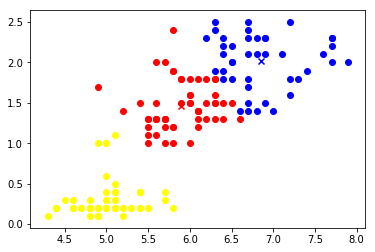

In [16]:
plt.scatter(c1[:,0], c1[:,3], c='red')
plt.scatter(c2[:,0], c2[:,3], c='blue')
plt.scatter(c3[:,0], c3[:,3], c='yellow')
plt.scatter(c[0,0], c[0,1], c='yellow', marker='x')
plt.scatter(c[1,0], c[1,1], c='red', marker='x')
plt.scatter(c[2,0], c[2,1], c='blue', marker='x')
plt.show()